In [1]:
import re
import pickle
import numpy as np
import pandas as pd
import os
import json

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
!pip install emoji --upgrade
import emoji

!pip install tweet-preprocessor
import preprocessor as p

In [4]:
!pip install transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures
from transformers import T5Tokenizer, T5ForConditionalGeneration
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
urw_collection = []
for dirname, _, filenames in os.walk('/Users/rishitajain/Downloads/archive'):
    for filename in filenames:
        fullpath = os.path.join(dirname, filename)
        urw_collection.append(fullpath)

In [5]:
urw_collection.sort()

In [6]:
feb_files = [file for file in urw_collection if re.search(r"feb", file) or re.search(r"022", file)]
feb_files

['/Users/rishitajain/Downloads/archive/feb0227.csv.gzip',
 '/Users/rishitajain/Downloads/archive/feb0228.csv.gzip',
 '/Users/rishitajain/Downloads/archive/feb0229.csv.gzip']

In [7]:
mar_files = [file for file in urw_collection if re.search(r"mar", file)]
mar_files

['/Users/rishitajain/Downloads/archive/mar0301.csv.gzip',
 '/Users/rishitajain/Downloads/archive/mar0302.csv.gzip',
 '/Users/rishitajain/Downloads/archive/mar0303.csv.gzip',
 '/Users/rishitajain/Downloads/archive/mar0304.csv.gzip',
 '/Users/rishitajain/Downloads/archive/mar0305.csv.gzip',
 '/Users/rishitajain/Downloads/archive/mar0306.csv.gzip',
 '/Users/rishitajain/Downloads/archive/mar0307.csv.gzip',
 '/Users/rishitajain/Downloads/archive/mar0308.csv.gzip',
 '/Users/rishitajain/Downloads/archive/mar0309.csv.gzip',
 '/Users/rishitajain/Downloads/archive/mar0310.csv.gzip',
 '/Users/rishitajain/Downloads/archive/mar0311.csv.gzip',
 '/Users/rishitajain/Downloads/archive/mar0312.csv.gzip',
 '/Users/rishitajain/Downloads/archive/mar0313.csv.gzip',
 '/Users/rishitajain/Downloads/archive/mar0314.csv.gzip',
 '/Users/rishitajain/Downloads/archive/mar0315.csv.gzip',
 '/Users/rishitajain/Downloads/archive/mar0316.csv.gzip',
 '/Users/rishitajain/Downloads/archive/mar0317.csv.gzip',
 '/Users/rishi

In [8]:
apr_files = [file for file in urw_collection if re.search(r"apr", file)]
apr_files

['/Users/rishitajain/Downloads/archive/apr0401.csv.gzip',
 '/Users/rishitajain/Downloads/archive/apr0402.csv.gzip',
 '/Users/rishitajain/Downloads/archive/apr0403.csv.gzip',
 '/Users/rishitajain/Downloads/archive/apr0404.csv.gzip',
 '/Users/rishitajain/Downloads/archive/apr0405.csv.gzip',
 '/Users/rishitajain/Downloads/archive/apr0406.csv.gzip',
 '/Users/rishitajain/Downloads/archive/apr0407.csv.gzip',
 '/Users/rishitajain/Downloads/archive/apr0408.csv.gzip',
 '/Users/rishitajain/Downloads/archive/apr0409.csv.gzip',
 '/Users/rishitajain/Downloads/archive/apr0410.csv.gzip',
 '/Users/rishitajain/Downloads/archive/apr0411.csv.gzip',
 '/Users/rishitajain/Downloads/archive/apr0412.csv.gzip',
 '/Users/rishitajain/Downloads/archive/apr0413.csv.gzip',
 '/Users/rishitajain/Downloads/archive/apr0414.csv.gzip',
 '/Users/rishitajain/Downloads/archive/apr0415.csv.gzip',
 '/Users/rishitajain/Downloads/archive/apr0416.csv.gzip',
 '/Users/rishitajain/Downloads/archive/apr0417.csv.gzip',
 '/Users/rishi

In [9]:
may_files = [file for file in urw_collection if re.search(r"may", file)]
may_files

['/Users/rishitajain/Downloads/archive/may0501.csv.gzip',
 '/Users/rishitajain/Downloads/archive/may0502.csv.gzip',
 '/Users/rishitajain/Downloads/archive/may0503.csv.gzip',
 '/Users/rishitajain/Downloads/archive/may0504.csv.gzip',
 '/Users/rishitajain/Downloads/archive/may0505.csv.gzip',
 '/Users/rishitajain/Downloads/archive/may0508.csv.gzip',
 '/Users/rishitajain/Downloads/archive/may0509.csv.gzip',
 '/Users/rishitajain/Downloads/archive/may0510.csv.gzip',
 '/Users/rishitajain/Downloads/archive/may0511.csv.gzip',
 '/Users/rishitajain/Downloads/archive/may0512.csv.gzip',
 '/Users/rishitajain/Downloads/archive/may0513.csv.gzip',
 '/Users/rishitajain/Downloads/archive/may0514.csv.gzip',
 '/Users/rishitajain/Downloads/archive/may0515.csv.gzip',
 '/Users/rishitajain/Downloads/archive/may0516.csv.gzip',
 '/Users/rishitajain/Downloads/archive/may0517.csv.gzip',
 '/Users/rishitajain/Downloads/archive/may0518.csv.gzip',
 '/Users/rishitajain/Downloads/archive/may0519.csv.gzip',
 '/Users/rishi

In [10]:
tmp_df_list = []
for file in feb_files:
    print(f"Reading in {file}")
    # unzip and read in the csv file as a dataframe
    tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)
    # append dataframe to temp list
    tmp_df_list.append(tmp_df)

print("Concatenating the DataFrames")
# concatenate the dataframes in the temp list row-wise
feb_df= pd.concat(tmp_df_list, axis=0)
print("Concatenation complete!")

Reading in /Users/rishitajain/Downloads/archive/feb0227.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/feb0228.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/682431765.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/feb0229.csv.gzip
Concatenating the DataFrames
Concatenation complete!


In [11]:
tmp_df_list = []
for file in mar_files:
    print(f"Reading in {file}")
    # unzip and read in the csv file as a dataframe
    tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)
    # append dataframe to temp list
    tmp_df_list.append(tmp_df)

print("Concatenating the DataFrames")
# concatenate the dataframes in the temp list row-wise
mar_df= pd.concat(tmp_df_list, axis=0)
print("Concatenation complete!")

Reading in /Users/rishitajain/Downloads/archive/mar0301.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0302.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0303.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0304.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/2375583803.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/mar0305.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/2375583803.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/mar0306.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/2375583803.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/mar0307.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/2375583803.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/mar0308.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0309.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/2375583803.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/mar0310.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/2375583803.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/mar0311.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0312.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/2375583803.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/mar0313.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0314.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0315.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0316.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0317.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0318.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/2375583803.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/mar0319.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0320.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0321.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0322.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0323.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0324.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0325.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0326.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0327.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/2375583803.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/mar0329.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/2375583803.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/mar0330.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/mar0331.csv.gzip
Concatenating the DataFrames
Concatenation complete!


In [12]:
tmp_df_list = []
for file in apr_files:
    print(f"Reading in {file}")
    # unzip and read in the csv file as a dataframe
    tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)
    # append dataframe to temp list
    tmp_df_list.append(tmp_df)

print("Concatenating the DataFrames")
# concatenate the dataframes in the temp list row-wise
apr_df= pd.concat(tmp_df_list, axis=0)
print("Concatenation complete!")

Reading in /Users/rishitajain/Downloads/archive/apr0401.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/3511579794.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/apr0402.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/3511579794.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/apr0403.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0404.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/3511579794.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/apr0405.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0406.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/3511579794.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/apr0407.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0408.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0409.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0410.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0411.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0412.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0413.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0414.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/3511579794.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/apr0415.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0416.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0417.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0418.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/3511579794.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/apr0419.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/3511579794.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/apr0420.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/3511579794.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/apr0421.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0422.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/3511579794.py:5: DtypeWarning: Columns (18,21,24,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/apr0423.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/3511579794.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/apr0424.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0425.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0426.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0427.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0428.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/apr0429.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/3511579794.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/apr0430.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/3511579794.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Concatenating the DataFrames
Concatenation complete!


In [ ]:
tmp_df_list = []
for file in may_files:
    print(f"Reading in {file}")
    # unzip and read in the csv file as a dataframe
    tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)
    # append dataframe to temp list
    tmp_df_list.append(tmp_df)

print("Concatenating the DataFrames")
# concatenate the dataframes in the temp list row-wise
may_df= pd.concat(tmp_df_list, axis=0)
print("Concatenation complete!")

Reading in /Users/rishitajain/Downloads/archive/may0501.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/may0502.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_10584/3976406661.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/may0503.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/may0504.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/may0505.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/may0508.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/may0509.csv.gzip


/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_10584/3976406661.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df = pd.read_csv(file, compression="gzip", header=0, index_col=0)


Reading in /Users/rishitajain/Downloads/archive/may0510.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/may0511.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/may0512.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/may0513.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/may0514.csv.gzip
Reading in /Users/rishitajain/Downloads/archive/may0515.csv.gzip


In [15]:
feb_df

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
1141800,1466752038960656385,Curtin2Tiffany,I am just like everyone else. The universe ex...,"Colorado, USA",253,40,94,2021-12-03 12:52:22.000000,1497724980259262467,2022-02-27 00:07:16,5,#UkraineRussiaWar Captured Russian soldiers\n\...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",en,NaN,0,2022-02-27 00:09:33.084131
1141801,1111276809302216710,5ela60,الأب ..الأخ ..الجار ..الحبيب .. السديك,NaN,167,9,656,2019-03-28 14:40:12.000000,1497724980271984641,2022-02-27 00:07:16,28,Like everybody else I am rooting for Ukraine t...,[],en,NaN,0,2022-02-27 00:09:33.068011
1141802,1364735420236505088,StatistWomen,🇹🇷,Cumhur İttifakı,1771,1766,37009,2021-02-25 00:35:28.000000,1497724980322349058,2022-02-27 00:07:16,3,"#Ukrayna Güvenlik Servisi, #Rus finosu #Kadiro...","[{'text': 'Ukrayna', 'indices': [15, 23]}, {'t...",tr,NaN,0,2022-02-27 00:09:33.059979
1141803,597779527,OurTurnToRescue,"Issues: Threats to Democracy, Racism, GOP corr...",NaN,4847,4080,33666,2012-06-02 21:53:59.000000,1497724980573966346,2022-02-27 00:07:16,1,We elected a game show host and got a clown. #...,"[{'text': 'Ukraine', 'indices': [63, 71]}]",en,NaN,0,2022-02-27 00:09:33.051823
1141804,1646145848,DrWAVeSportCd1,"Addicted to News, Music, Cooking, Gardens, Out...",USA,5002,3950,466629,2013-08-04 21:07:08.000000,1497724980653694976,2022-02-27 00:07:16,277,Ukrainian soldiers wearing sunflowers in their...,"[{'text': 'Ukraine', 'indices': [122, 130]}, {...",en,NaN,0,2022-02-27 00:09:33.043812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140379,17185461,cratylus,"Programmer interested in Philosophy,Maths and ...","Perth, Australia",661,955,13348,2008-11-05 09:20:13.000000,1498440721015078914,2022-02-28 23:31:22,9,✍️The fifth day of Russian Invasion - summary ...,[],en,NaN,0,2022-02-28 23:32:03.485217
140380,3314420144,DyNEn_L,ก็รักไปแล้ว จะให้กูทำยังไง🍋🍊\nสถานะ:ตายในหน้าท...,หาเจอได้ตามป่า,472,106,95050,2015-08-13 14:26:37.000000,1498440721019600897,2022-02-28 23:31:22,4199,สวิสเซอร์แลนด์หยุดเป็นกลาง\nอายัดทรัพย์สินปูติ...,[],th,NaN,0,2022-02-28 23:32:03.470264
140381,979378741884407810,son_sonnnn,NaN,NaN,158,13,576,2018-03-29 15:24:22.000000,1498440721157787648,2022-02-28 23:31:22,12,🇺🇦 Как работают диверсионные маячки!\n\n#Украи...,"[{'text': 'Украина', 'indices': [54, 62]}, {'t...",ru,NaN,0,2022-02-28 23:32:03.463382
140382,324746604,OS_Beaver,Huge Oregon State Beavers fan! Time for the R...,Oregon,2813,392,7459,2011-06-27 04:24:42.000000,1498440721459679234,2022-02-28 23:31:22,597,Mayor of Kharkiv: many dead and wounded during...,[],en,NaN,0,2022-02-28 23:32:03.448230


In [16]:
apr_df

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,...,original_tweet_id,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username
0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04.000000,1509681950042198030,2022-04-01 00:00:00.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34.000000,1509681950151348229,2022-04-01 00:00:00.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01.000000,1509681950683926556,2022-04-01 00:00:00.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44.000000,1509681951116046336,2022-04-01 00:00:00.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,2022-03-20 04:04:40.000000,1509681951304990720,2022-04-01 00:00:00.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328070,1499160290121981956,Mlat62133772,Fighting against #WeaponizedRapeInTigray\nትግራይ...,NaN,1122,1114,42941,2022-03-02 23:12:02.000000,1520553580796784642,2022-04-30 23:59:58.000000,...,1.519294e+18,1.491434e+18,kinghacker86,0.0,0.0,NaN,False,0.0,0.0,NaN
328071,1493385267901833218,Kisanet13989143,ውግሕ ክትብል ምድሪ ብብስራት ፀሓይ ከመይ ሓዲራ እብል እሓተልኪ ደሃይ!,NaN,1001,350,24626,2022-02-15 00:43:09.000000,1520553580884905987,2022-04-30 23:59:58.000000,...,1.520497e+18,1.498988e+18,Mulu999344782,0.0,0.0,NaN,False,0.0,0.0,NaN
328072,3357427702,b1e56df9ce6549f,"human being, person, individual, coen bros. ch...",usa,5858,5506,921596,2015-07-03 20:03:56.000000,1520553583892119552,2022-04-30 23:59:59.000000,...,1.512415e+18,1.199768e+18,kk131066,0.0,0.0,NaN,False,0.0,0.0,NaN
328073,1511397942942384134,Yohanes45682079,ትግራይ ትስዕር,NaN,559,393,37449,2022-04-05 17:39:27.000000,1520553584768786434,2022-04-30 23:59:59.000000,...,1.520461e+18,1.506753e+18,wukro_gual,0.0,0.0,NaN,False,0.0,0.0,NaN


In [17]:
mar_df

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
149212,37334464,DownandOut1489,Because He lives I can face tomorrow. Because ...,NaN,914,759,40561,2009-05-03 01:43:15.000000,1498447926531887104,2022-03-01 00:00:00,0,It’s all a game and anonymous cowards are runn...,"[{'text': 'coronavirus', 'indices': [78, 90]},...",en,NaN,0,2022-03-01 00:02:49.301209
149213,17710740,dna,"Follow us for news, photos, videos and the lat...",India,24,2264852,647718,2008-11-28 15:39:38.000000,1498447927009693697,2022-03-01 00:00:00,0,.@peta urges government to rescue student alon...,"[{'text': 'UkraineRussiaWar', 'indices': [80, ...",en,NaN,0,2022-03-01 00:02:49.285327
149214,318485865,BlakeAlldredge,"Follower of Jesus, husband, father of 4. Sport...",Texas,734,241,10044,2011-06-16 15:25:41.000000,1498447927022264320,2022-03-01 00:00:00,0,Instead of talking about how to save lives in ...,"[{'text': 'Ukraine', 'indices': [46, 54]}]",en,NaN,0,2022-03-01 00:02:49.269168
149215,3541217477,jethom33545,NaN,NaN,114,6,700,2015-09-04 04:47:44.000000,1498447927236255754,2022-03-01 00:00:00,1684,✊🏼🇺🇦 \n#Ukraine #Україна #StandWithUkriane htt...,"[{'text': 'Ukraine', 'indices': [26, 34]}, {'t...",und,NaN,0,2022-03-01 00:02:49.257766
149216,14115646,donnyd,"MD. My daughter, Alicia(27), died by suicide J...","Stoney Creek, Ontario",1269,1668,22199,2008-03-10 17:27:33.000000,1498447927622176768,2022-03-01 00:00:00,20587,Moscow underground. Sometimes the act of resis...,"[{'text': 'Ukraine', 'indices': [122, 130]}]",en,NaN,0,2022-03-01 00:02:49.222513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344510,1502237057195945984,tsion_tigray,"Never Give up,Proud To Be Tgraweyti💖🎯‼️\n\n ...",NaN,482,348,6583,2022-03-11 10:57:08.000000,1509677723136020480,2022-03-31 23:43:12.000000,53,"@Abiy Ahmed, Eritrean dictator Isaias Afewerki...",[],en,NaN,0,2022-03-31 23:43:57.801891
344511,823139604115001344,TLBSociety,Common sense is understanding nature and natur...,The America's,416,845,31521,2017-01-22 12:05:49.000000,1509677724490641410,2022-03-31 23:43:12.000000,35,"#MARIUPOL—However, even at #Ilyich, #Ukraine|i...","[{'text': 'MARIUPOL', 'indices': [12, 21]}, {'...",en,NaN,0,2022-03-31 23:43:57.795027
344512,1502028100967624704,abwly73052028,mohmmad68718436@ :حسابي الاساسي,chennai,39,41,3234,2022-03-10 21:06:38.000000,1509677724880703495,2022-03-31 23:43:12.000000,67,🎥 دفعة جديدة من القوات الشيشانية انضمت للاعمال...,"[{'text': 'Russia', 'indices': [105, 112]}, {'...",ar,NaN,0,2022-03-31 23:43:57.788174
344513,1126857882308304896,k9planet_japan,K-9 PLANETでは、オリジナルTシャツ、K-9グッズ、ディスクドッグなどのアウトドアグ...,愛媛県松山市,309,199,3456,2019-05-10 14:33:49.000000,1509677724914569220,2022-03-31 23:43:12.000000,0,🇺🇦 PRAY FOR UKRAINE K9\nペット先進国ウクライナ\nウクライナK-9達...,"[{'text': 'repost', 'indices': [53, 60]}, {'te...",ja,NaN,0,2022-03-31 23:43:57.781210


In [18]:
may_df

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,...,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,extractedts
0,529588633,PLinToronto,Consulate General of the Republic of Poland in...,"Toronto, Ontario",674,2977,10112,2012-03-19 18:10:36.000000,1520553587276795905,2022-05-01 00:00:00.000000,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-05-01 09:12:42.918515
1,835922746416762880,arctic_fox_PTN,News of the war in Ukraine. Chronicle of Putin...,Украина,368,158,62968,2017-02-26 18:41:28.000000,1520553587490926594,2022-05-01 00:00:00.000000,...,1102047326,mil_in_ua,0,0,NaN,False,0,0,NaN,2022-05-01 00:21:48.021996
2,15640646,Journey_America,Freelance writer. I'm always interested in dis...,"Buenos Aires, Argentina",2658,207542,139467,2008-07-29 01:54:36.000000,1520553587763515392,2022-05-01 00:00:00.000000,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-05-01 04:12:17.557660
3,1503095448864755715,RaesiEse,NaN,NaN,929,834,90759,2022-03-13 19:47:54.000000,1520553587939676160,2022-05-01 00:00:00.000000,...,1494062983617847296,MargMar80017297,0,0,NaN,False,0,0,NaN,2022-05-01 00:07:10.218746
4,22240612,AlArabiya_Eng,The Arab world’s leading source of global news...,Dubai,46,914292,315194,2009-02-28 08:31:32.000000,1520553588086525952,2022-05-01 00:00:00.000000,...,0,NaN,0,0,NaN,False,0,0,NaN,2022-05-01 00:26:31.623553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231694,1369294520433532930,ujLV2RY6FQx9926,Take down the CCP!,NaN,988,830,10555,2021-03-09 14:30:42.000000,1529613255647236097,2022-05-25 23:59:53.000000,...,1382077019740008448,Karin77G,0,0,NaN,False,0,0,NaN,2022-05-26 02:02:46.360686
231695,242997845,missjst,"D, drum corps, cats, Pac 12/Seahawks football,...",Washinton,253,1065,322601,2011-01-26 02:16:15.000000,1529613259296239616,2022-05-25 23:59:54.000000,...,1505481949854502912,Gerashchenko_en,0,0,NaN,False,0,0,NaN,2022-05-26 01:21:37.658200
231696,213491014,JeffCassman,Celebrating 27 yrs of marriage & 14 kids. Cont...,"Nashville, TN",2197,5418,10803,2010-11-09 01:49:04.000000,1529613262488317953,2022-05-25 23:59:55.000000,...,0,NaN,0,0,NaN,True,1529611258760134656,637003328,lxm713,2022-05-26 00:50:07.623218
231697,1329236609166925827,Startre72377111,Born in Sicily (Italy). Now in the USA. @AdamS...,Chicago🇺🇸 Roma 🇮🇹,1354,957,93387,2020-11-19 01:35:16.000000,1529613262765031425,2022-05-25 23:59:55.000000,...,544732668,KyleWOrton,0,0,NaN,False,0,0,NaN,2022-05-26 02:02:46.334603


In [13]:
feb_df = feb_df.drop(columns = ['coordinates', 'extractedts', 'acctdesc'])

In [14]:
feb_df["usercreatedts"] = pd.to_datetime(feb_df["usercreatedts"])
feb_df["tweetcreatedts"] = pd.to_datetime(feb_df["tweetcreatedts"])

In [15]:
feb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735189 entries, 1141800 to 140383
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   userid          735189 non-null  int64         
 1   username        735189 non-null  object        
 2   location        429725 non-null  object        
 3   following       735189 non-null  int64         
 4   followers       735189 non-null  int64         
 5   totaltweets     735189 non-null  int64         
 6   usercreatedts   735189 non-null  datetime64[ns]
 7   tweetid         735189 non-null  int64         
 8   tweetcreatedts  735189 non-null  datetime64[ns]
 9   retweetcount    735189 non-null  int64         
 10  text            735189 non-null  object        
 11  hashtags        735189 non-null  object        
 12  language        735189 non-null  object        
 13  favorite_count  735189 non-null  int64         
dtypes: datetime64[ns](2), int64(7)

In [16]:
apr_df = apr_df.drop(columns = ['coordinates', 'extractedts', 'acctdesc', 'original_tweet_id', 'original_tweet_userid',	'original_tweet_username',	'in_reply_to_status_id', 'in_reply_to_user_id',	'in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id', 'quoted_status_userid', 'quoted_status_username'])

In [17]:
apr_df["usercreatedts"] = pd.to_datetime(apr_df["usercreatedts"])
apr_df["tweetcreatedts"] = pd.to_datetime(apr_df["tweetcreatedts"])

In [18]:
apr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11107791 entries, 0 to 328074
Data columns (total 15 columns):
 #   Column          Dtype         
---  ------          -----         
 0   userid          int64         
 1   username        object        
 2   location        object        
 3   following       int64         
 4   followers       int64         
 5   totaltweets     int64         
 6   usercreatedts   datetime64[ns]
 7   tweetid         int64         
 8   tweetcreatedts  datetime64[ns]
 9   retweetcount    int64         
 10  text            object        
 11  hashtags        object        
 12  language        object        
 13  favorite_count  int64         
 14  is_retweet      object        
dtypes: datetime64[ns](2), int64(7), object(6)
memory usage: 1.3+ GB


In [19]:
apr_df = apr_df.drop(columns = ['is_retweet'])

In [20]:
mar_df = mar_df.drop(columns = ['coordinates', 'extractedts', 'acctdesc'])

In [21]:
mar_df["usercreatedts"] = pd.to_datetime(mar_df["usercreatedts"])
mar_df["tweetcreatedts"] = pd.to_datetime(mar_df["tweetcreatedts"])

In [22]:
mar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13618741 entries, 149212 to 344514
Data columns (total 14 columns):
 #   Column          Dtype         
---  ------          -----         
 0   userid          int64         
 1   username        object        
 2   location        object        
 3   following       int64         
 4   followers       int64         
 5   totaltweets     int64         
 6   usercreatedts   datetime64[ns]
 7   tweetid         int64         
 8   tweetcreatedts  datetime64[ns]
 9   retweetcount    int64         
 10  text            object        
 11  hashtags        object        
 12  language        object        
 13  favorite_count  int64         
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 1.5+ GB


In [24]:
may_df = may_df.drop(columns = ['coordinates', 'extractedts', 'acctdesc', 'original_tweet_id', 'original_tweet_userid',	'original_tweet_username',	'in_reply_to_status_id', 'in_reply_to_user_id',	'in_reply_to_screen_name', 'is_quote_status', 'quoted_status_id', 'quoted_status_userid', 'quoted_status_username', 'is_retweet'])

In [25]:
may_df["usercreatedts"] = pd.to_datetime(may_df["usercreatedts"])
may_df["tweetcreatedts"] = pd.to_datetime(may_df["tweetcreatedts"])

In [26]:
may_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7861493 entries, 0 to 231698
Data columns (total 14 columns):
 #   Column          Dtype         
---  ------          -----         
 0   userid          int64         
 1   username        object        
 2   location        object        
 3   following       int64         
 4   followers       int64         
 5   totaltweets     int64         
 6   usercreatedts   datetime64[ns]
 7   tweetid         int64         
 8   tweetcreatedts  datetime64[ns]
 9   retweetcount    int64         
 10  text            object        
 11  hashtags        object        
 12  language        object        
 13  favorite_count  int64         
dtypes: datetime64[ns](2), int64(7), object(5)
memory usage: 899.7+ MB


In [27]:
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

<AxesSubplot:ylabel='language'>

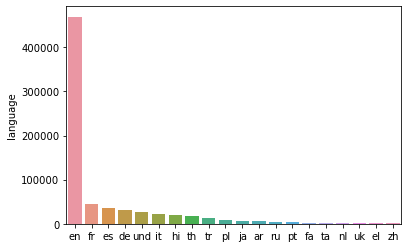

In [28]:
sns.barplot(x= feb_df.language.value_counts()[:20].index,y=feb_df.language.value_counts()[:20])

<AxesSubplot:ylabel='language'>

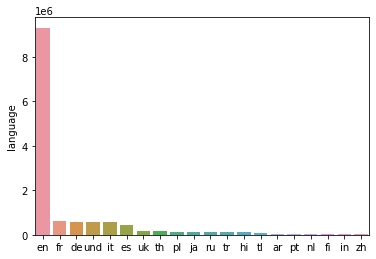

In [29]:
sns.barplot(x= mar_df.language.value_counts()[:20].index,y=mar_df.language.value_counts()[:20])

<AxesSubplot:ylabel='language'>

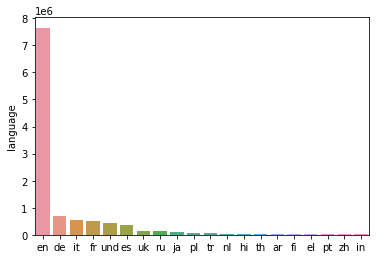

In [30]:
sns.barplot(x= apr_df.language.value_counts()[:20].index,y=apr_df.language.value_counts()[:20])

<AxesSubplot:ylabel='language'>

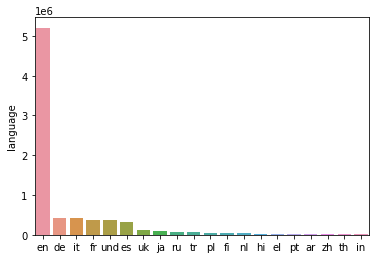

In [31]:
sns.barplot(x= may_df.language.value_counts()[:20].index,y=may_df.language.value_counts()[:20])

<AxesSubplot:>

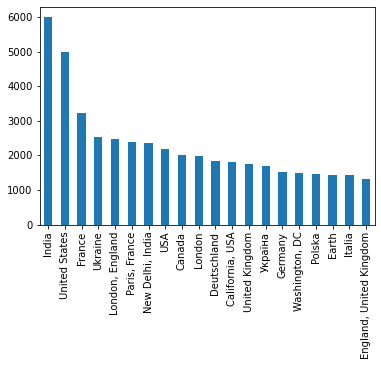

In [32]:
feb_df.location.value_counts()[:20].plot.bar()

<AxesSubplot:>

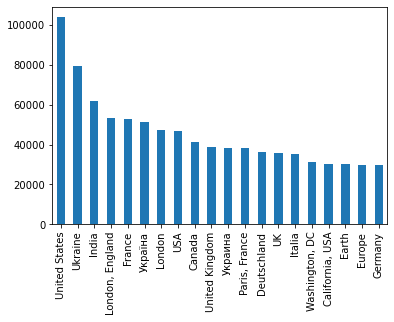

In [33]:
mar_df.location.value_counts()[:20].plot.bar()

<AxesSubplot:>

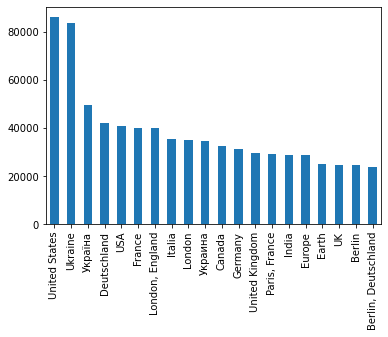

In [34]:
apr_df.location.value_counts()[:20].plot.bar()

<AxesSubplot:>

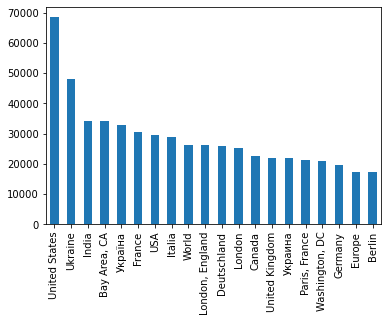

In [35]:
may_df.location.value_counts()[:20].plot.bar()

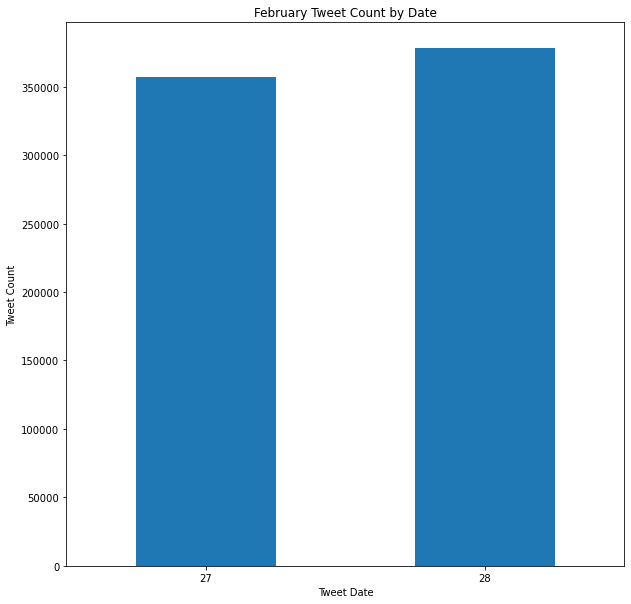

In [32]:
dates = feb_df["tweetcreatedts"].dt.day
# group tweet timestamps by date and get tweet count for each date
tweetcount_by_date = feb_df["tweetcreatedts"].groupby(dates).size()

# plot bar graph of tweet count by date
tweetcount_by_date.plot.bar(figsize = (10, 10));

plt.title("February Tweet Count by Date")
plt.xlabel("Tweet Date")
plt.ylabel("Tweet Count")
plt.xticks(rotation=0)
plt.show()

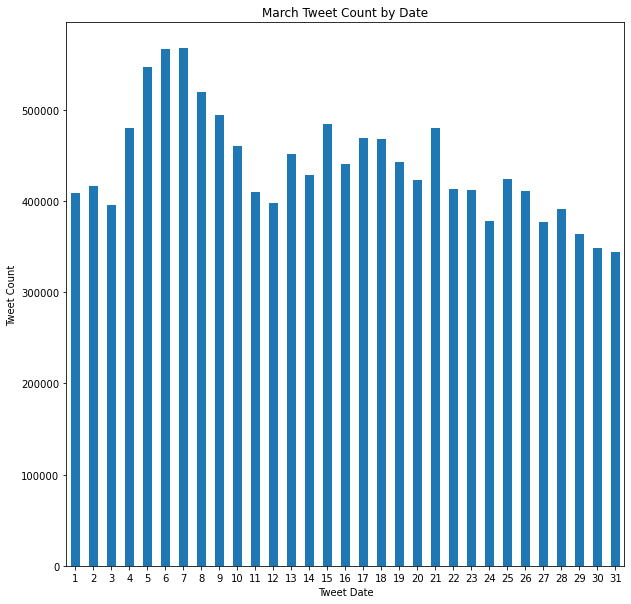

In [33]:
dates = mar_df["tweetcreatedts"].dt.day
# group tweet timestamps by date and get tweet count for each date
tweetcount_by_date = mar_df["tweetcreatedts"].groupby(dates).size()

# plot bar graph of tweet count by date
tweetcount_by_date.plot.bar(figsize = (10, 10));

plt.title("March Tweet Count by Date")
plt.xlabel("Tweet Date")
plt.ylabel("Tweet Count")
plt.xticks(rotation=0)
plt.show()

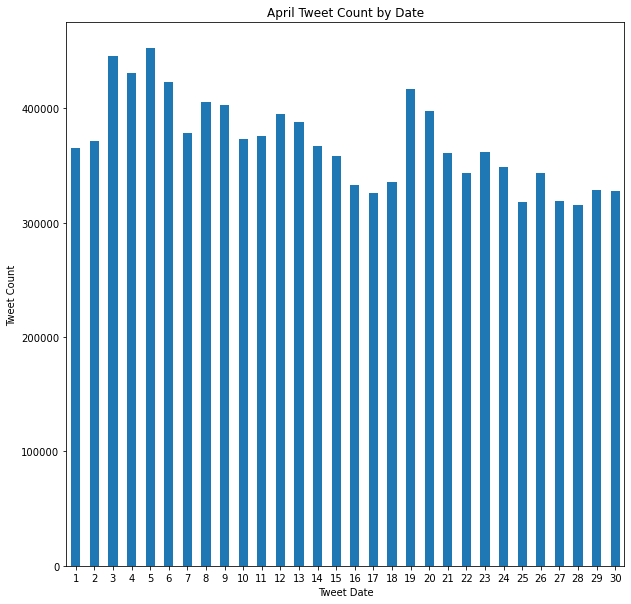

In [34]:
dates = apr_df["tweetcreatedts"].dt.day
# group tweet timestamps by date and get tweet count for each date
tweetcount_by_date = apr_df["tweetcreatedts"].groupby(dates).size()

# plot bar graph of tweet count by date
tweetcount_by_date.plot.bar(figsize = (10, 10));

plt.title("April Tweet Count by Date")
plt.xlabel("Tweet Date")
plt.ylabel("Tweet Count")
plt.xticks(rotation=0)
plt.show()

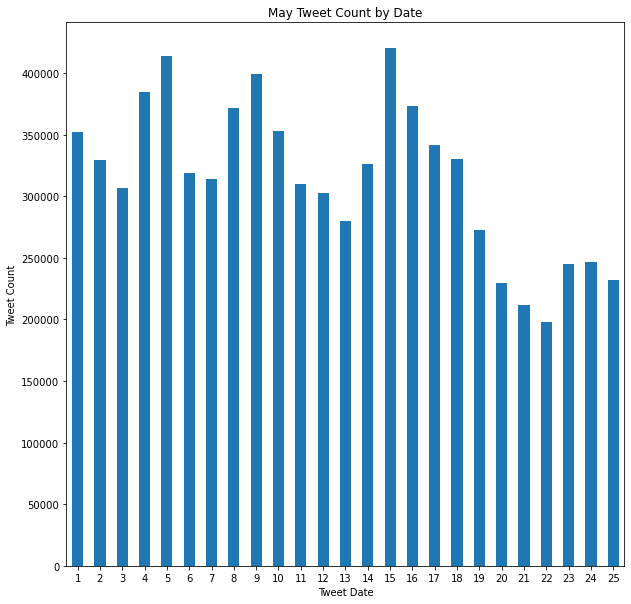

In [35]:
dates = may_df["tweetcreatedts"].dt.day
# group tweet timestamps by date and get tweet count for each date
tweetcount_by_date = may_df["tweetcreatedts"].groupby(dates).size()

# plot bar graph of tweet count by date
tweetcount_by_date.plot.bar(figsize = (10, 10));

plt.title("May Tweet Count by Date")
plt.xlabel("Tweet Date")
plt.ylabel("Tweet Count")
plt.xticks(rotation=0)
plt.show()

In [36]:
print(f"{round(feb_df.loc[feb_df['language']=='en'].shape[0]/feb_df.shape[0]*100, 2)}% of the tweets are in English.")

63.81% of the tweets are in English.


In [37]:
print(f"{round(mar_df.loc[mar_df['language']=='en'].shape[0]/mar_df.shape[0]*100, 2)}% of the tweets are in English.")

68.3% of the tweets are in English.


In [38]:
print(f"{round(apr_df.loc[apr_df['language']=='en'].shape[0]/apr_df.shape[0]*100, 2)}% of the tweets are in English.")

68.88% of the tweets are in English.


In [39]:
print(f"{round(may_df.loc[may_df['language']=='en'].shape[0]/may_df.shape[0]*100, 2)}% of the tweets are in English.")

66.23% of the tweets are in English.


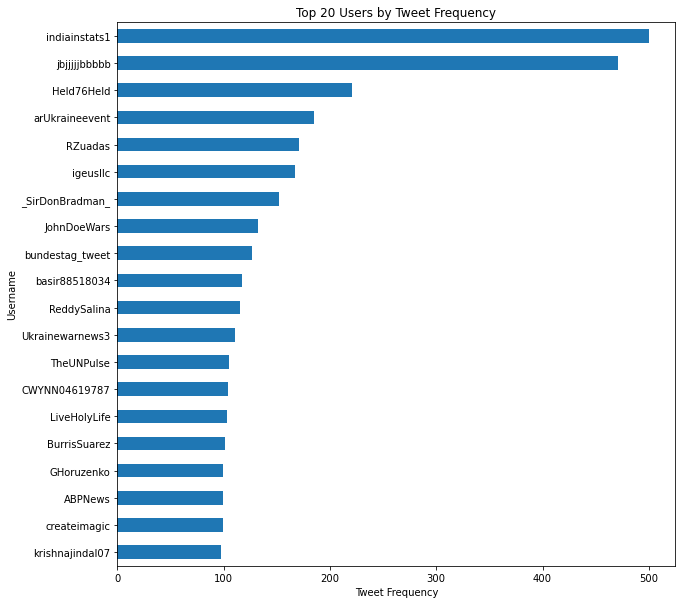

In [40]:
plt.figure(figsize=(10,10))
feb_df["username"].value_counts().sort_values(ascending=True)[-20:].plot.barh();
plt.title("Top 20 Users by Tweet Frequency")
plt.xlabel("Tweet Frequency")
plt.ylabel("Username")
plt.show()

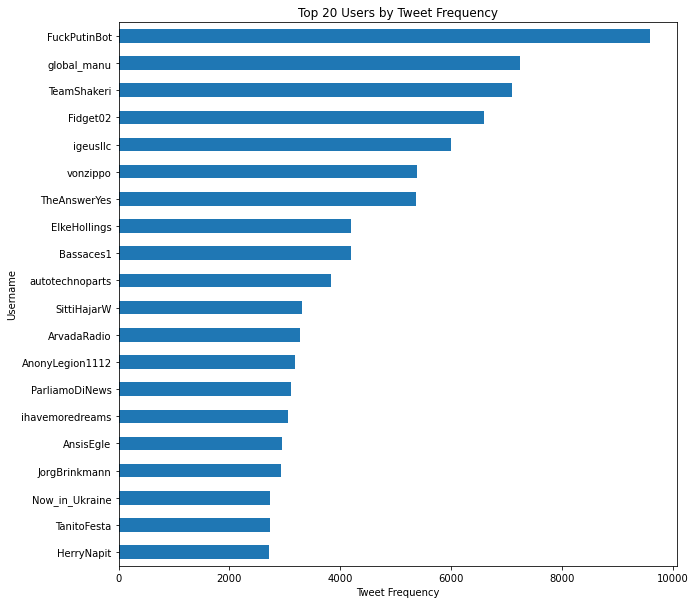

In [41]:
plt.figure(figsize=(10,10))
mar_df["username"].value_counts().sort_values(ascending=True)[-20:].plot.barh();
plt.title("Top 20 Users by Tweet Frequency")
plt.xlabel("Tweet Frequency")
plt.ylabel("Username")
plt.show()

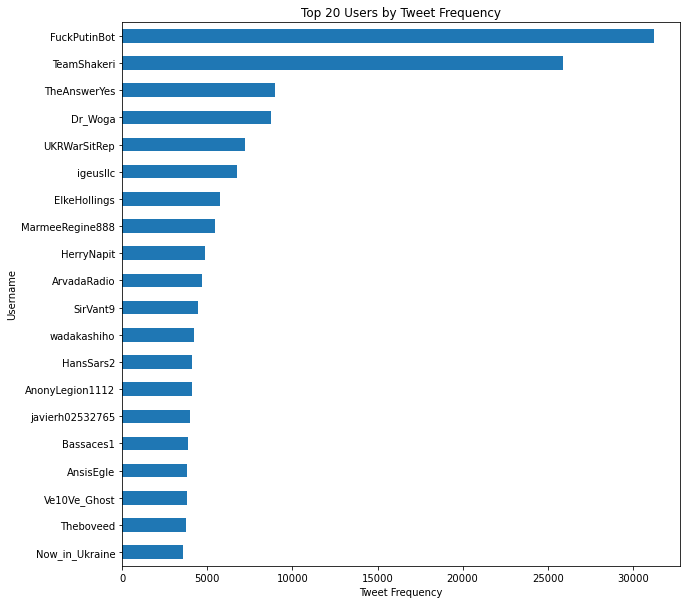

In [42]:
plt.figure(figsize=(10,10))
apr_df["username"].value_counts().sort_values(ascending=True)[-20:].plot.barh();
plt.title("Top 20 Users by Tweet Frequency")
plt.xlabel("Tweet Frequency")
plt.ylabel("Username")
plt.show()

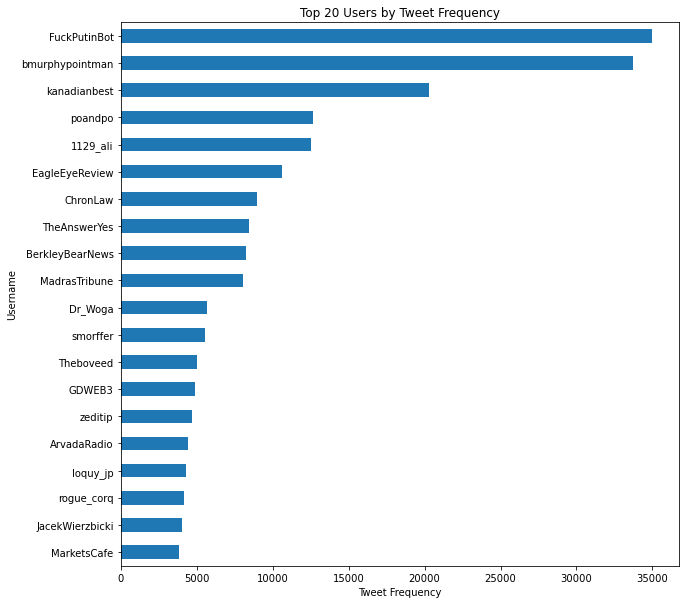

In [43]:
plt.figure(figsize=(10,10))
may_df["username"].value_counts().sort_values(ascending=True)[-20:].plot.barh();
plt.title("Top 20 Users by Tweet Frequency")
plt.xlabel("Tweet Frequency")
plt.ylabel("Username")
plt.show()

In [44]:
feb_df.isna().any()

userid            False
username          False
location           True
following         False
followers         False
totaltweets       False
usercreatedts     False
tweetid           False
tweetcreatedts    False
retweetcount      False
text              False
hashtags          False
language          False
favorite_count    False
dtype: bool

In [45]:
missing_location_count = feb_df.loc[feb_df["location"].isna()].shape[0]
print(f"{missing_location_count} rows are missing location information.")
print(f"{round(missing_location_count/feb_df.shape[0]*100,2)}% of the rows are missing location information.")

305464 rows are missing location information.
41.55% of the rows are missing location information.


In [46]:
mar_df.isna().any()

userid            False
username          False
location           True
following         False
followers         False
totaltweets       False
usercreatedts     False
tweetid           False
tweetcreatedts    False
retweetcount      False
text              False
hashtags          False
language          False
favorite_count    False
dtype: bool

In [47]:
missing_location_count = mar_df.loc[mar_df["location"].isna()].shape[0]
print(f"{missing_location_count} rows are missing location information.")
print(f"{round(missing_location_count/mar_df.shape[0]*100,2)}% of the rows are missing location information.")

5641339 rows are missing location information.
41.42% of the rows are missing location information.


In [48]:
apr_df.isna().any()

userid            False
username          False
location           True
following         False
followers         False
totaltweets       False
usercreatedts     False
tweetid           False
tweetcreatedts    False
retweetcount      False
text              False
hashtags          False
language          False
favorite_count    False
dtype: bool

In [49]:
missing_location_count = apr_df.loc[apr_df["location"].isna()].shape[0]
print(f"{missing_location_count} rows are missing location information.")
print(f"{round(missing_location_count/apr_df.shape[0]*100,2)}% of the rows are missing location information.")

4924613 rows are missing location information.
44.33% of the rows are missing location information.


In [50]:
may_df.isna().any()

userid            False
username          False
location           True
following         False
followers         False
totaltweets       False
usercreatedts     False
tweetid           False
tweetcreatedts    False
retweetcount      False
text              False
hashtags          False
language          False
favorite_count    False
dtype: bool

In [51]:
missing_location_count = may_df.loc[may_df["location"].isna()].shape[0]
print(f"{missing_location_count} rows are missing location information.")
print(f"{round(missing_location_count/may_df.shape[0]*100,2)}% of the rows are missing location information.")

3276566 rows are missing location information.
41.68% of the rows are missing location information.


In [52]:
feb_df.loc[feb_df.duplicated(["text"],keep=False)].sort_values("text").head()

,userid,username,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count
1680337,334234572,loskotka_,NaN,294,1170,33265,2011-07-12 19:43:24,1498270306963759115,2022-02-28 12:14:12,7,"! UKRAINE WE WANT TO HELP !\n\nHey I’m Alia, I...",[],en,0
18515,1319010088137445379,HCE93567529,Nigeria,340,19,102,2020-10-21 20:18:56,1498334576468504590,2022-02-28 16:29:35,18,"! UKRAINE WE WANT TO HELP !\n\nHey I’m Alia, I...",[],en,0
1360056,95407913,tektur,"München, Bayern, Germany",560,213,45910,2009-12-08 12:11:04,1497929641612521474,2022-02-27 13:40:31,5,!!! EIL !!!#Putin versetzt Atomstreitkräfte in...,"[{'text': 'Putin', 'indices': [25, 31]}, {'tex...",de,0
1359937,1482632039962664960,SubDegauss,NaN,1066,482,2321,2022-01-16 08:33:30,1497929628706607108,2022-02-27 13:40:28,5,!!! EIL !!!#Putin versetzt Atomstreitkräfte in...,"[{'text': 'Putin', 'indices': [25, 31]}, {'tex...",de,0
1358140,1416031161474813958,BBoyce287,NaN,101,67,236,2021-07-16 13:46:20,1497929321838784513,2022-02-27 13:39:15,7,!!! Warning !!!\nThis video contains scenes th...,[],en,0


In [53]:
mar_df.loc[mar_df.duplicated(["text"],keep=False)].sort_values("text").head()

,userid,username,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count
6291274,1160701680587083776,DarkSabin,NaN,145,24,5718,2019-08-11 23:57:00,1503170286723678212,2022-03-14 00:44:58,6,!\n\n#Putin ‼️Obyś zdechł skurwysynu!!\n\n#Ukr...,"[{'text': 'Putin', 'indices': [19, 25]}, {'tex...",pl,0
5815609,835393924340527104,AWarszasky,"Warsaw, Poland",1598,1470,8368,2017-02-25 07:40:07,1502788109519540228,2022-03-12 23:26:20,2,!\n\n#Putin ‼️Obyś zdechł skurwysynu!!\n\n#Ukr...,"[{'text': 'Putin', 'indices': [3, 9]}, {'text'...",pl,3
6102251,1496922463623647233,KedarNaw,NaN,8,0,50,2022-02-24 18:58:59,1503030111985152005,2022-03-13 15:27:58,5,!\n\n#Putin ‼️Obyś zdechł skurwysynu!!\n\n#Ukr...,"[{'text': 'Putin', 'indices': [19, 25]}, {'tex...",pl,0
6066805,1250340156139139074,Beata23877802,NaN,67,2,74,2020-04-15 08:28:39,1503006411625803777,2022-03-13 13:53:47,4,!\n\n#Putin ‼️Obyś zdechł skurwysynu!!\n\n#Ukr...,"[{'text': 'Putin', 'indices': [19, 25]}, {'tex...",pl,0
5929016,742877683646922752,rafalch2,"Dolnośląskie, Polska",888,593,19260,2016-06-15 00:33:37,1502903639706374149,2022-03-13 07:05:24,3,!\n\n#Putin ‼️Obyś zdechł skurwysynu!!\n\n#Ukr...,"[{'text': 'Putin', 'indices': [19, 25]}, {'tex...",pl,0


In [54]:
apr_df.loc[apr_df.duplicated(["text"],keep=False)].sort_values("text").head()

,userid,username,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count
225792,902356780486930432,3M_MarkM,TX Hill Country,6623,6302,39202,2017-08-29 02:26:36,1515374933995569161,2022-04-16 17:01:53,11,!\n\n Busses instead of trains.\n\n#Ukrain...,"[{'text': 'Ukraine', 'indices': [56, 64]}, {'t...",en,0
325975,1929030181,marynlm,"Florida, USA",72546,74278,179849,2013-10-03 02:29:20,1515471280585256973,2022-04-16 23:24:44,33,!\n\n Busses instead of trains.\n\n#Ukrain...,"[{'text': 'Ukraine', 'indices': [56, 64]}, {'t...",en,0
256403,760694335356690432,1zzyzyx1,L.A. & Coachella Valley,24366,23162,351961,2016-08-03 04:30:37,1515402041333452802,2022-04-16 18:49:36,27,!\n\n Busses instead of trains.\n\n#Ukrain...,"[{'text': 'Ukraine', 'indices': [56, 64]}, {'t...",en,0
221005,73377501,ScottsHusband,NC,13969,15549,183620,2009-09-11 12:46:53,1515370341643829249,2022-04-16 16:43:38,4,!\n\n Busses instead of trains.\n\n#Ukrain...,"[{'text': 'Ukraine', 'indices': [56, 64]}, {'t...",en,0
262815,2766603077,slwiede66,WESTERN NEW YORK,5000,4023,214531,2014-09-10 20:05:29,1515408563132420096,2022-04-16 19:15:31,28,!\n\n Busses instead of trains.\n\n#Ukrain...,"[{'text': 'Ukraine', 'indices': [56, 64]}, {'t...",en,0


In [55]:
may_df.loc[may_df.duplicated(["text"],keep=False)].sort_values("text").head()

,userid,username,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count
738880,1203153399266459649,LovelydayTech,NaN,467,645,64825,2019-12-07 03:25:30,1522739122909106176,2022-05-07 00:44:32,1,! \n\n#slow #fast #UN_Women\n\n#UN #NATO #WHO ...,"[{'text': 'slow', 'indices': [24, 29]}, {'text...",en,0
738557,1510360241552207881,Marcelobass182,Minas Gerais Br / Itabira-Bh,73,15,16154,2022-04-02 20:55:56,1522738475115634689,2022-05-07 00:41:58,1,! \n\n#slow #fast #UN_Women\n\n#UN #NATO #WHO ...,"[{'text': 'slow', 'indices': [4, 9]}, {'text':...",en,0
530241,1498589291865329665,YroslawS,NaN,21,1,53,2022-03-01 09:22:06,1522525886410539008,2022-05-06 10:37:13,2,! ! The Russians broke into Azovstal\nIn block...,[],en,0
168831,1462196919699222534,VolodymyrSosun,Україна,190,10,145,2021-11-20 23:11:57,1521835197515317249,2022-05-04 12:52:40,0,! ! The Russians broke into Azovstal\nIn block...,"[{'text': 'azovstal', 'indices': [194, 203]}, ...",en,0
374029,1427991213655793664,Mospedaw1,NaN,5004,390,12948,2021-08-18 13:50:33,1521990897369444352,2022-05-04 23:11:21,1,! ! The Russians broke into Azovstal\nIn block...,[],en,0


In [23]:
feb_df.drop_duplicates(["text"], inplace=True)

In [24]:
feb_df.duplicated().any()

False

In [25]:
mar_df.drop_duplicates(["text"], inplace=True)

In [26]:
mar_df.duplicated().any()

False

In [27]:
apr_df.drop_duplicates(["text"], inplace=True)

In [28]:
apr_df.duplicated().any()

False

In [42]:
may_df.drop_duplicates(["text"], inplace=True)

In [43]:
may_df.duplicated().any()

False

In [29]:
feb_df.shape

(256663, 14)

In [65]:
mar_df.shape

(3852815, 14)

In [66]:
apr_df.shape

(2576613, 14)

In [67]:
may_df.shape

(2743456, 14)

In [30]:
feb_df = feb_df.loc[feb_df["language"]=="en"]
print(f"{feb_df.shape[0]} rows are in English")

149088 rows are in English


In [31]:
mar_df = mar_df.loc[mar_df["language"]=="en"]
print(f"{mar_df.shape[0]} rows are in English")

2282984 rows are in English


In [32]:
apr_df = apr_df.loc[apr_df["language"]=="en"]
print(f"{apr_df.shape[0]} rows are in English")

1463898 rows are in English


In [47]:
may_df = may_df.loc[may_df["language"]=="en"]
print(f"{may_df.shape[0]} rows are in English")

1602354 rows are in English


In [78]:
may_df.columns

Index(['userid', 'username', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'favorite_count'],
      dtype='object')

In [33]:
feb_df.reset_index(inplace=True, drop=True)
# check
feb_df.head()

,userid,username,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count
0,1466752038960656385,Curtin2Tiffany,"Colorado, USA",253,40,94,2021-12-03 12:52:22,1497724980259262467,2022-02-27 00:07:16,5,#UkraineRussiaWar Captured Russian soldiers\n\...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",en,0
1,1111276809302216710,5ela60,NaN,167,9,656,2019-03-28 14:40:12,1497724980271984641,2022-02-27 00:07:16,28,Like everybody else I am rooting for Ukraine t...,[],en,0
2,597779527,OurTurnToRescue,NaN,4847,4080,33666,2012-06-02 21:53:59,1497724980573966346,2022-02-27 00:07:16,1,We elected a game show host and got a clown. #...,"[{'text': 'Ukraine', 'indices': [63, 71]}]",en,0
3,1646145848,DrWAVeSportCd1,USA,5002,3950,466629,2013-08-04 21:07:08,1497724980653694976,2022-02-27 00:07:16,277,Ukrainian soldiers wearing sunflowers in their...,"[{'text': 'Ukraine', 'indices': [122, 130]}, {...",en,0
4,2191952909,WyvernReports,The Blue Marble,700,6424,20689,2013-11-22 21:51:19,1497724980833968129,2022-02-27 00:07:16,565,russian troops destroyed a commercial oil base...,[],en,0


In [34]:
feb_df.shape

(149088, 14)

In [35]:
mar_df.reset_index(inplace=True, drop=True)
# check
mar_df.head()

,userid,username,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count
0,37334464,DownandOut1489,NaN,914,759,40561,2009-05-03 01:43:15,1498447926531887104,2022-03-01,0,It’s all a game and anonymous cowards are runn...,"[{'text': 'coronavirus', 'indices': [78, 90]},...",en,0
1,17710740,dna,India,24,2264852,647718,2008-11-28 15:39:38,1498447927009693697,2022-03-01,0,.@peta urges government to rescue student alon...,"[{'text': 'UkraineRussiaWar', 'indices': [80, ...",en,0
2,318485865,BlakeAlldredge,Texas,734,241,10044,2011-06-16 15:25:41,1498447927022264320,2022-03-01,0,Instead of talking about how to save lives in ...,"[{'text': 'Ukraine', 'indices': [46, 54]}]",en,0
3,14115646,donnyd,"Stoney Creek, Ontario",1269,1668,22199,2008-03-10 17:27:33,1498447927622176768,2022-03-01,20587,Moscow underground. Sometimes the act of resis...,"[{'text': 'Ukraine', 'indices': [122, 130]}]",en,0
4,2714124895,KarinKelly,NaN,155,92,2213,2014-08-07 08:59:56,1498447928033165317,2022-03-01,6,When you know physics and geo-politics! #Ukrai...,"[{'text': 'Ukraine', 'indices': [61, 69]}]",en,0


In [36]:
apr_df.reset_index(inplace=True, drop=True)
# check
apr_df.head()

,userid,username,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count
0,16882774,Yaniela,Hawaii,1158,392,88366,2008-10-21 07:34:04,1509681950042198030,2022-04-01,3412,⚡The Ukrainian Air Force would like to address...,[],en,0
1,3205296069,gregffff,NaN,122,881,99853,2015-04-25 11:24:34,1509681950151348229,2022-04-01,100,Chernihiv oblast. Ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,0
2,1235940869812809728,ThanapornThon17,NaN,231,72,5481,2020-03-06 14:52:01,1509681950683926556,2022-04-01,9,America 🇺🇸 is preparing for something worse th...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,0
3,1347985375566966784,I_Protest_2021,International Web Zone,399,377,301,2021-01-09 19:15:44,1509681951116046336,2022-04-01,573,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",en,0
4,1505394816636846083,Marsh_Win_01,Hunter Account,158,25,8982,2022-03-20 04:04:40,1509681951304990720,2022-04-01,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,0


In [51]:
may_df.reset_index(inplace=True, drop=True)
# check
may_df.head()

,userid,username,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,favorite_count
0,529588633,PLinToronto,"Toronto, Ontario",674,2977,10112,2012-03-19 18:10:36,1520553587276795905,2022-05-01,2,Remember this 👇 image next time you fix a meal...,"[{'text': 'StopRussianOil', 'indices': [245, 2...",en,5
1,15640646,Journey_America,"Buenos Aires, Argentina",2658,207542,139467,2008-07-29 01:54:36,1520553587763515392,2022-05-01,1,Everything Is [Not] Fine: Half-.. - via @pensi...,"[{'text': 'Politics', 'indices': [51, 60]}, {'...",en,0
2,1503095448864755715,RaesiEse,NaN,929,834,90759,2022-03-13 19:47:54,1520553587939676160,2022-05-01,47,"People #Tigray lives in condition of No water,...","[{'text': 'Tigray', 'indices': [28, 35]}]",en,0
3,22240612,AlArabiya_Eng,Dubai,46,914292,315194,2009-02-28 08:31:32,1520553588086525952,2022-05-01,4,#Russia’s forces have stolen “several hundred ...,"[{'text': 'Russia', 'indices': [0, 7]}, {'text...",en,7
4,152930351,AnonGhostt,UK,7,5035,376494,2010-06-07 07:02:46,1520553588421918720,2022-05-01,6522,The #Anonymous collective has sent 7.000.000 a...,"[{'text': 'Anonymous', 'indices': [21, 31]}]",en,0


In [37]:
from unidecode import unidecode
def evaluate_hashtags(x):
    hashtags = []
    
    a = eval(str(x))
    
    for item in a:
        hashtags.append((str(unidecode(item["text"])).lower()))
        hashtags = list(set(hashtags))
        
    return hashtags

In [38]:
feb_masterlist = []
hashtagsListCollection = feb_df["hashtags"].apply(evaluate_hashtags)

for hashtagsList in hashtagsListCollection:
    for hashtag in hashtagsList:
        feb_masterlist.append(hashtag)

In [54]:
topXItem = 25
from collections import Counter

x = Counter(feb_masterlist)

topXItemList = x.most_common(topXItem)

In [83]:
feb_df_hash = pd.DataFrame(topXItemList)
feb_df_hash.columns =['Hashtag','Tweets']
feb_df_hash

,Hashtag,Tweets
0,ukraine,388269
1,news,252387
2,russia,192656
3,business,179618
4,usa,123362
5,standwithukraine,78777
6,putin,73406
7,nato,58215
8,russian,55905
9,ukrainewar,53558


In [56]:
mar_masterlist = []
hashtagsListCollection = mar_df["hashtags"].apply(evaluate_hashtags)

for hashtagsList in hashtagsListCollection:
    for hashtag in hashtagsList:
        mar_masterlist.append(hashtag)

In [57]:
topXItem = 25
from collections import Counter

x = Counter(mar_masterlist)

topXItemList = x.most_common(topXItem)

In [58]:
mar_df_hash = pd.DataFrame(topXItemList)
mar_df_hash.columns =['Hashtag','Tweets']
mar_df_hash

,Hashtag,Tweets
0,ukraine,1025484
1,russia,494921
2,putin,352614
3,standwithukraine,239303
4,ukrainerussiawar,130851
5,ukrainewar,125819
6,russian,118670
7,nato,114870
8,ukrainerussianwar,104998
9,russiaukrainewar,89879


In [59]:
apr_masterlist = []
hashtagsListCollection = apr_df["hashtags"].apply(evaluate_hashtags)

for hashtagsList in hashtagsListCollection:
    for hashtag in hashtagsList:
        apr_masterlist.append(hashtag)

In [61]:
topXItem = 25
from collections import Counter

x = Counter(apr_masterlist)

topXItemList = x.most_common(topXItem)

In [62]:
apr_df_hash = pd.DataFrame(topXItemList)
apr_df_hash.columns =['Hashtag','Tweets']
apr_df_hash

,Hashtag,Tweets
0,ukraine,627268
1,russia,303487
2,putin,149208
3,standwithukraine,145810
4,russian,86796
5,ukrainewar,79296
6,ukrainerussiawar,78109
7,nato,71813
8,mariupol,68319
9,usa,55473


In [63]:
may_masterlist = []
hashtagsListCollection = may_df["hashtags"].apply(evaluate_hashtags)

for hashtagsList in hashtagsListCollection:
    for hashtag in hashtagsList:
        may_masterlist.append(hashtag)

In [64]:
topXItem = 25
from collections import Counter

x = Counter(may_masterlist)

topXItemList = x.most_common(topXItem)

In [65]:
may_df_hash = pd.DataFrame(topXItemList)
may_df_hash.columns =['Hashtag','Tweets']
may_df_hash

,Hashtag,Tweets
0,ukraine,388269
1,news,252387
2,russia,192656
3,business,179618
4,usa,123362
5,standwithukraine,78777
6,putin,73406
7,nato,58215
8,russian,55905
9,ukrainewar,53558


In [77]:
feb_df["text"].head(10)

0    #UkraineRussiaWar Captured Russian soldiers\n\...
1    Like everybody else I am rooting for Ukraine t...
2    We elected a game show host and got a clown. #...
3    Ukrainian soldiers wearing sunflowers in their...
4    russian troops destroyed a commercial oil base...
5    Some scenes from #Kyiv this morning: The build...
6    Meanwhile American “intelligence” pretended an...
7    To remind the world: Gaza has lived through 4 ...
8    Please pass it on if you can spot the differen...
9    In their coverage @FoxNews actually sound disa...
Name: text, dtype: object

In [78]:
mar_df["text"].head(10)

0    It’s all a game and anonymous cowards are runn...
1    .@peta urges government to rescue student alon...
2    Instead of talking about how to save lives in ...
3    Moscow underground. Sometimes the act of resis...
4    When you know physics and geo-politics! #Ukrai...
5    Ukrainian forces believe the border personnel ...
6    via @mxdwnGames: Video Game Industry Shares Su...
7    A misleading tweet supposedly described #Russi...
8    #Ukraine: Finally, some video of UA SoF ambush...
9    European Union leaders may discuss the possibi...
Name: text, dtype: object

In [79]:
apr_df["text"].head(10)

0    ⚡The Ukrainian Air Force would like to address...
1    Chernihiv oblast. Ukrainians welcome their lib...
2    America 🇺🇸 is preparing for something worse th...
3    JUST IN: #Anonymous has hacked &amp; released ...
4    ***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...
5    The Amazing story of Former Sussex County Dela...
6    &amp;quot;How we were waiting for you!&amp;quo...
7    India's purchase of discounted #Russian crude ...
8    The most basic tenet of what stability exists ...
9    "The image that Russia acquired over the past ...
Name: text, dtype: object

In [80]:
may_df["text"].head(10)

0    Remember this 👇 image next time you fix a meal...
1    Everything Is [Not] Fine: Half-.. - via @pensi...
2    People #Tigray lives in condition of No water,...
3    #Russia’s forces have stolen “several hundred ...
4    The #Anonymous collective has sent 7.000.000 a...
5    A compilation of a series of emotional tweets ...
6    Dear @SecBlinken,\nWhat welcoming actions take...
7    Further #Russian reinforcements to the #Izyum ...
8    #Russian "killer squad has been linked to vile...
9    Despite the truce, no aid has entered Tigray w...
Name: text, dtype: object

In [39]:
feb_df["cleaned_text"] = feb_df["text"].str.lower()
# check
feb_df["cleaned_text"].head(10)

0    #ukrainerussiawar captured russian soldiers\n\...
1    like everybody else i am rooting for ukraine t...
2    we elected a game show host and got a clown. #...
3    ukrainian soldiers wearing sunflowers in their...
4    russian troops destroyed a commercial oil base...
5    some scenes from #kyiv this morning: the build...
6    meanwhile american “intelligence” pretended an...
7    to remind the world: gaza has lived through 4 ...
8    please pass it on if you can spot the differen...
9    in their coverage @foxnews actually sound disa...
Name: cleaned_text, dtype: object

In [40]:
mar_df["cleaned_text"] = mar_df["text"].str.lower()
# check
mar_df["cleaned_text"].head(10)

0    it’s all a game and anonymous cowards are runn...
1    .@peta urges government to rescue student alon...
2    instead of talking about how to save lives in ...
3    moscow underground. sometimes the act of resis...
4    when you know physics and geo-politics! #ukrai...
5    ukrainian forces believe the border personnel ...
6    via @mxdwngames: video game industry shares su...
7    a misleading tweet supposedly described #russi...
8    #ukraine: finally, some video of ua sof ambush...
9    european union leaders may discuss the possibi...
Name: cleaned_text, dtype: object

In [41]:
apr_df["cleaned_text"] = apr_df["text"].str.lower()
# check
apr_df["cleaned_text"].head(10)

0    ⚡the ukrainian air force would like to address...
1    chernihiv oblast. ukrainians welcome their lib...
2    america 🇺🇸 is preparing for something worse th...
3    just in: #anonymous has hacked &amp; released ...
4    ***public mint now live***\n\nfor \n@billionai...
5    the amazing story of former sussex county dela...
6    &amp;quot;how we were waiting for you!&amp;quo...
7    india's purchase of discounted #russian crude ...
8    the most basic tenet of what stability exists ...
9    "the image that russia acquired over the past ...
Name: cleaned_text, dtype: object

In [84]:
may_df["cleaned_text"] = may_df["text"].str.lower()
# check
may_df["cleaned_text"].head(10)

0    remember this 👇 image next time you fix a meal...
1    everything is [not] fine: half-.. - via @pensi...
2    people #tigray lives in condition of no water,...
3    #russia’s forces have stolen “several hundred ...
4    the #anonymous collective has sent 7.000.000 a...
5    a compilation of a series of emotional tweets ...
6    dear @secblinken,\nwhat welcoming actions take...
7    further #russian reinforcements to the #izyum ...
8    #russian "killer squad has been linked to vile...
9    despite the truce, no aid has entered tigray w...
Name: cleaned_text, dtype: object

In [42]:
def remove_unnecessary(text):
    # INPUT: string (tweet)
    # OUTPUT: string without URLs, mentions, hashtags, digist, and emojis (and smileys)
    p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.HASHTAG, p.OPT.NUMBER, p.OPT.EMOJI, p.OPT.SMILEY)
    result = p.clean(text)
    return result

In [43]:
feb_df["cleaned_text"] = feb_df["cleaned_text"].map(remove_unnecessary)
# check
feb_df["cleaned_text"].head(10)

0    captured russian soldiers "they said what thei...
1    like everybody else i am rooting for ukraine t...
2    we elected a game show host and got a clown. e...
3    ukrainian soldiers wearing sunflowers in their...
4    russian troops destroyed a commercial oil base...
5    some scenes from this morning: the building at...
6    meanwhile american intelligence pretended an e...
7    to remind the world: gaza has lived through wa...
8    please pass it on if you can spot the difference.
9    in their coverage actually sound disappointed ...
Name: cleaned_text, dtype: object

In [44]:
mar_df["cleaned_text"] = mar_df["cleaned_text"].map(remove_unnecessary)
# check
mar_df["cleaned_text"].head(10)

0    its all a game and anonymous cowards are runni...
1    . urges government to rescue student along wit...
2    instead of talking about how to save lives in ...
3    moscow underground. sometimes the act of resis...
4              when you know physics and geo-politics!
5    ukrainian forces believe the border personnel ...
6    via : video game industry shares support for u...
7    a misleading tweet supposedly described missil...
8    : finally, some video of ua sof ambushing russ...
9    european union leaders may discuss the possibi...
Name: cleaned_text, dtype: object

In [45]:
apr_df["cleaned_text"] = apr_df["cleaned_text"].map(remove_unnecessary)
# check
apr_df["cleaned_text"].head(10)

0    the ukrainian air force would like to address ...
1    chernihiv oblast. ukrainians welcome their lib...
2    america is preparing for something worse than ...
3    just in: has hacked &amp; released emails from...
4    ***public mint now live*** for win $100,000 du...
5    the amazing story of former sussex county dela...
6    &amp;quot;how we were waiting for you!&amp;quo...
7    india's purchase of discounted crude oil and p...
8    the most basic tenet of what stability exists ...
9    "the image that russia acquired over the past ...
Name: cleaned_text, dtype: object

In [89]:
may_df["cleaned_text"] = may_df["cleaned_text"].map(remove_unnecessary)
# check

may_df["cleaned_text"].head(10)

0    remember this image next time you fix a meal f...
1              everything is [not] fine: half-.. - via
2    people lives in condition of no water, no food...
3    forces have stolen several hundred thousand to...
4    the collective has sent anti-war texts to russ...
5    a compilation of a series of emotional tweets ...
6    dear , what welcoming actions taken by are you...
7    further reinforcements to the axis are unlikel...
8    "killer squad has been linked to vile war crim...
9    despite the truce, no aid has entered tigray w...
Name: cleaned_text, dtype: object

In [46]:
final_df = pd.concat([feb_df,mar_df,apr_df],axis=1)

In [50]:
final_df.columns

Index(['userid', 'username', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'favorite_count',
       'cleaned_text', 'userid', 'username', 'location', 'following',
       'followers', 'totaltweets', 'usercreatedts', 'tweetid',
       'tweetcreatedts', 'retweetcount', 'text', 'hashtags', 'language',
       'favorite_count', 'cleaned_text', 'userid', 'username', 'location',
       'following', 'followers', 'totaltweets', 'usercreatedts', 'tweetid',
       'tweetcreatedts', 'retweetcount', 'text', 'hashtags', 'language',
       'favorite_count', 'cleaned_text'],
      dtype='object')

In [51]:
final_df = feb_df.append(mar_df).append(apr_df)

/var/folders/f3/vhjrz95x7zb97qbtlcxtjx0c0000gn/T/ipykernel_1032/4168580027.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = feb_df.append(mar_df).append(apr_df)


In [53]:
final_df.columns

Index(['userid', 'username', 'location', 'following', 'followers',
       'totaltweets', 'usercreatedts', 'tweetid', 'tweetcreatedts',
       'retweetcount', 'text', 'hashtags', 'language', 'favorite_count',
       'cleaned_text'],
      dtype='object')

In [54]:
final_df.to_csv("final.csv", index=False)

In [56]:
apr_df.to_csv("apr.csv", encoding = "utf-8")

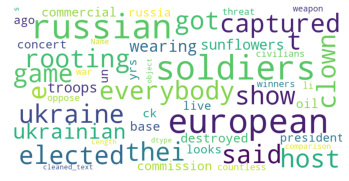

In [90]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(feb_df['cleaned_text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

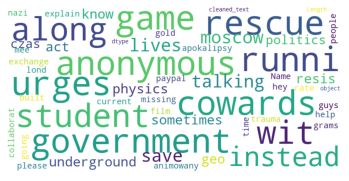

In [91]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(mar_df['cleaned_text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

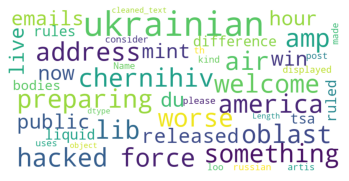

In [92]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(apr_df['cleaned_text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

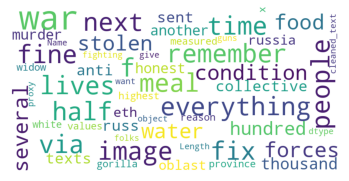

In [93]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      scale = 2,
                      random_state=42
                     ).generate(str(may_df['cleaned_text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()